In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train_path = ".\data\\df_train.csv"
train_dataframe = pd.read_csv(train_path)
test_path = ".\data\\df_test.csv"
test_dataframe = pd.read_csv(test_path)

In [7]:
train_dataframe.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016/3/14 17:24,2016/3/14 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016/6/12 0:43,2016/6/12 0:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016/1/19 11:35,2016/1/19 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016/4/6 19:32,2016/4/6 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016/3/26 13:30,2016/3/26 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [8]:
test_dataframe.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [9]:
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1048575 non-null  object 
 1   vendor_id           1048575 non-null  int64  
 2   pickup_datetime     1048575 non-null  object 
 3   dropoff_datetime    1048575 non-null  object 
 4   passenger_count     1048575 non-null  int64  
 5   pickup_longitude    1048575 non-null  float64
 6   pickup_latitude     1048575 non-null  float64
 7   dropoff_longitude   1048575 non-null  float64
 8   dropoff_latitude    1048575 non-null  float64
 9   store_and_fwd_flag  1048575 non-null  object 
 10  trip_duration       1048575 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 88.0+ MB


In [10]:
test_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [11]:
train_dataframe.duplicated().sum()

0

In [12]:
test_dataframe.duplicated().sum()

0

In [13]:
train_dataframe.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [14]:
test_dataframe.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [15]:
train_dataframe.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.534503e+00,1.664382e+00,-7.397342e+01,4.075094e+01,-7.397336e+01,4.075183e+01,9.621448e+02
std,4.988084e-01,1.314261e+00,4.280165e-02,3.381389e-02,4.274282e-02,3.645002e-02,5.853002e+03
min,1.000000e+00,0.000000e+00,-7.854740e+01,3.435970e+01,-7.981798e+01,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399186e+01,4.073738e+01,-7.399131e+01,4.073594e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075415e+01,-7.397973e+01,4.075455e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396731e+01,4.076836e+01,-7.396301e+01,4.076984e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.391176e+01,3.526282e+06


In [16]:
test_dataframe.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


数据分析与可视化

（1）打车需求高发期分析

In [21]:
import datetime
from datetime import datetime
train_dataframe.pickup_datetime = train_dataframe.pickup_datetime.apply(lambda x:datetime.strptime(str(x), '%Y/%m/%d %H:%M'))
train_dataframe["pickup_yearmonth"] = train_dataframe["pickup_datetime"].map(lambda x: 100*x.year + x.month)
train_dataframe.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_yearmonth
0,id2875421,2,2016-03-14 17:24:00,2016/3/14 17:32,1,-73.982155,40.767937,-73.96463,40.765602,N,455,201603


In [22]:
train_dataframe["pickup_yearmonth"].value_counts()

# 数据分析：只有六个月的数据

201603    184135
201604    180940
201605    178585
201602    171599
201606    168212
201601    165104
Name: pickup_yearmonth, dtype: int64

In [24]:
train_dataframe["pickup_month"] = train_dataframe["pickup_datetime"].map(lambda x: x.month)
train_dataframe.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_yearmonth,pickup_month
0,id2875421,2,2016-03-14 17:24:00,2016/3/14 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455,201603,3
1,id2377394,1,2016-06-12 00:43:00,2016/6/12 0:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663,201606,6


In [25]:
train_dataframe["pickup_date"]=train_dataframe.pickup_datetime.values.astype("datetime64[D]")
train_dataframe.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_yearmonth,pickup_month,pickup_date
0,id2875421,2,2016-03-14 17:24:00,2016/3/14 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455,201603,3,2016-03-14
1,id2377394,1,2016-06-12 00:43:00,2016/6/12 0:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663,201606,6,2016-06-12


In [26]:
train_dataframe["pickup_day"]=train_dataframe.pickup_datetime.apply(lambda x: x.day)
train_dataframe.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_yearmonth,pickup_month,pickup_date,pickup_day
0,id2875421,2,2016-03-14 17:24:00,2016/3/14 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455,201603,3,2016-03-14,14
1,id2377394,1,2016-06-12 00:43:00,2016/6/12 0:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663,201606,6,2016-06-12,12


In [27]:
month_trip=train_dataframe.groupby(['pickup_month'])["trip_duration"].agg(["sum","mean","count"])
month_trip=month_trip.reset_index() 
month_trip.rename(columns={'sum':'month_sum_trip_dur','mean':'month_avg_trip_dur','count':"month_trip_times"}, inplace = True)
month_trip.head(6)

# 数据分析：分别统计六个月的搭车旅程总时长，搭车旅程平均时长，搭车总次数

,pickup_month,month_sum_trip_dur,month_avg_trip_dur,month_trip_times
0,1,153561518,930.089628,165104
1,2,159557453,929.827406,171599
2,3,172337789,935.931729,184135
3,4,173324577,957.911888,180940
4,5,179036849,1002.530162,178585
5,6,171062781,1016.947548,168212


In [28]:
date_trip=train_dataframe.groupby(['pickup_date'])["trip_duration"].agg(["sum","mean","count"])
date_trip=date_trip.reset_index() 
date_trip.rename(columns={'sum':'date_sum_trip_duration','mean':'date_avg_trip_dur','count':"date_trip_times"}, inplace = True)
date_trip.head(len(date_trip))

# 数据分析：统计六个月中每天的搭车旅程总时长，搭车旅程平均时长，搭车总次数

,pickup_date,date_sum_trip_duration,date_avg_trip_dur,date_trip_times
0,2016-01-01,4909806,949.305104,5172
1,2016-01-02,3852119,817.859660,4710
2,2016-01-03,4256287,928.509380,4584
3,2016-01-04,4044162,845.528330,4783
4,2016-01-05,8666715,1704.703973,5084
...,...,...,...,...
177,2016-06-26,5254685,1028.716719,5108
178,2016-06-27,5079450,968.806027,5243
179,2016-06-28,5291458,1017.001345,5203
180,2016-06-29,5499542,1012.061465,5434


In [29]:
day_trip=train_dataframe.groupby(['pickup_day'])["trip_duration"].agg(["sum","mean","count"])
day_trip=day_trip.reset_index() 
day_trip.rename(columns={'sum':'day_sum_trip_duration','mean':'day_avg_trip_dur','count':"day_trip_times"}, inplace = True)
day_trip.head(len(day_trip))

# 数据分析：统计月中每天的搭车旅程总时长，搭车旅程平均时长，搭车总次数

,pickup_day,day_sum_trip_duration,day_avg_trip_dur,day_trip_times
0,1,32550766,965.439732,33716
1,2,31537615,919.383582,34303
2,3,33933572,980.767421,34599
3,4,33715217,944.245141,35706
4,5,38309632,1064.570444,35986
5,6,32973315,926.008622,35608
6,7,31224809,888.861311,35129
7,8,32125194,926.866532,34660
8,9,33336591,934.269127,35682
9,10,32260712,917.540159,35160


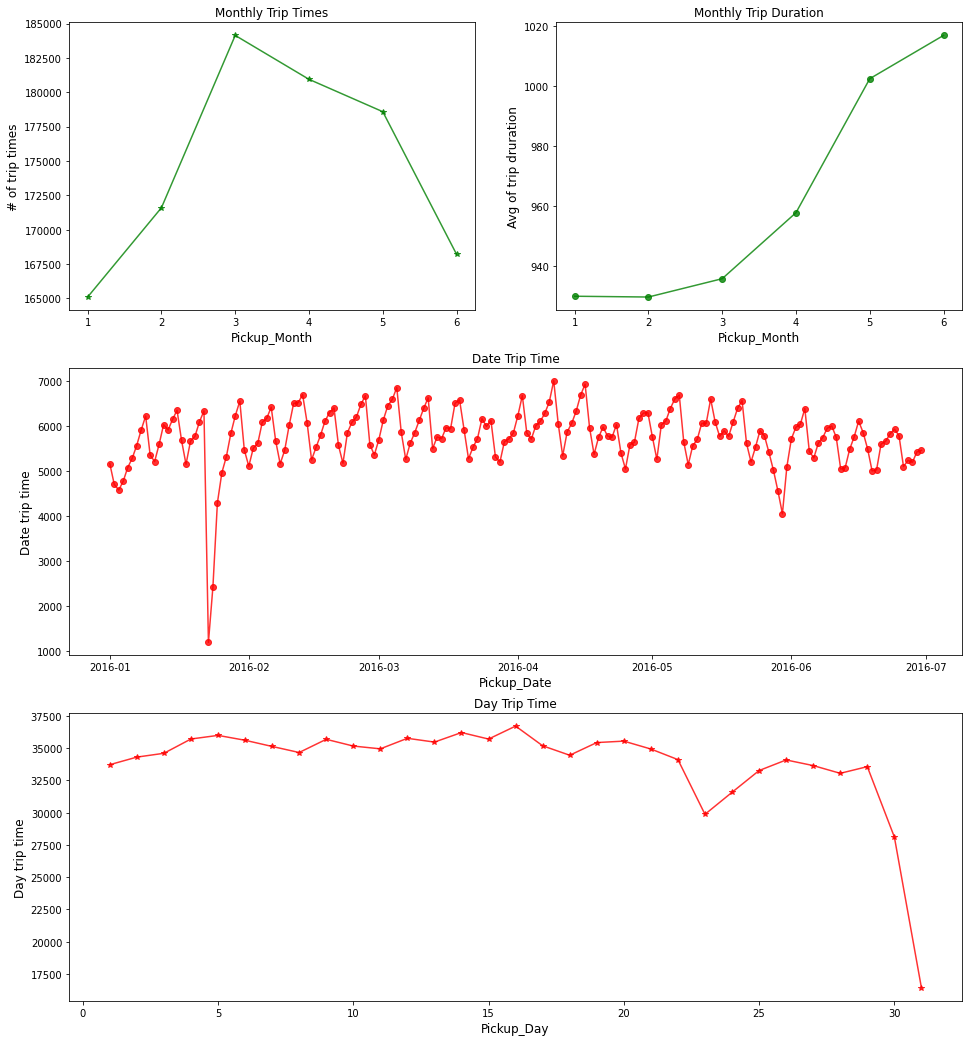

In [30]:
# plot
plt.figure(figsize=(16,18))

plt.subplot(321)
ax1= plt.plot(month_trip.pickup_month, month_trip.month_trip_times, color="green", alpha=0.8, label='trip times',marker='*')
plt.title("Monthly Trip Times")
plt.ylabel('# of trip times', fontsize=12)
plt.xlabel('Pickup_Month', fontsize=12)

plt.subplot(322)
ax2= plt.plot(month_trip.pickup_month, month_trip.month_avg_trip_dur, color="green",alpha=0.8,marker='o')
plt.title("Monthly Trip Duration")
plt.ylabel('Avg of trip druration', fontsize=12)
plt.xlabel('Pickup_Month', fontsize=12)

plt.subplot(312)
ax2= plt.plot(date_trip.pickup_date, date_trip.date_trip_times, color="red", alpha=0.8,marker='o')
plt.title("Date Trip Time")
plt.ylabel('Date trip time', fontsize=12)
plt.xlabel('Pickup_Date', fontsize=12)

plt.subplot(313)
ax2= plt.plot(day_trip.pickup_day, day_trip.day_trip_times, color="red", alpha=0.8,marker='*')
plt.title("Day Trip Time")
plt.ylabel('Day trip time', fontsize=12)
plt.xlabel('Pickup_Day', fontsize=12)

plt.show()

# 从趋势来说，2016年1~6月整体打车时长一直呈增长状态，可能用户逐渐习惯了更远距离也打车。

# 其中，3月-5月订单数量属于六个月中最高的三个月，但是整体下降趋势。

# 1月下旬和5月底有异常点，这两天打车人数特别少，可能是当天发生了什么重大事故，或者是重大节日不出行。

# 从日折线图来看，忽略23号和31号两个异常点，整体订单数量随日期变化呈现规律波动，看似周期为7天（一个星期），据此推测订单数量可能与星期几有关。


In [31]:
# 1、分析异常值

# 从图"Date Trip Time"可以定义异常值临界点为6000，将低于6000的异常值筛选出来。

date_trip[date_trip.date_trip_times<6000]

# 找出异常的日期是1月23日，1月24日，5月30日。
# 分析其原因。根据当日美国新闻：

# (1)美遭暴风雪袭击 纽约时报广场飞雪飘零_网易新闻
# 2016-1-24 · 当地时间2016年1月23日，美国纽约，美国遭遇暴雪天气，暴雪中的时报广场。

# (2)阵亡将士纪念日 (5月的最后一个星期一)
# 中新网5月30日电 据美媒报道，美国迎来“国殇日”长周末，标志着夏季的正式开始。


,pickup_date,date_sum_trip_duration,date_avg_trip_dur,date_trip_times
0,2016-01-01,4909806,949.305104,5172
1,2016-01-02,3852119,817.859660,4710
2,2016-01-03,4256287,928.509380,4584
3,2016-01-04,4044162,845.528330,4783
4,2016-01-05,8666715,1704.703973,5084
...,...,...,...,...
177,2016-06-26,5254685,1028.716719,5108
178,2016-06-27,5079450,968.806027,5243
179,2016-06-28,5291458,1017.001345,5203
180,2016-06-29,5499542,1012.061465,5434


（2）订单数量与星期关系分析

In [35]:
x = train_dataframe.groupby(['pickup_day'])["passenger_count"].agg(["mean"])
x = x.reset_index() 
day_trip["avg_passenger_count"] = x["mean"]
day_trip.head(len(day_trip))

,pickup_day,day_sum_trip_duration,day_avg_trip_dur,day_trip_times,avg_passenger_count
0,1,32550766,965.439732,33716,1.684364
1,2,31537615,919.383582,34303,1.663528
2,3,33933572,980.767421,34599,1.651955
3,4,33715217,944.245141,35706,1.638408
4,5,38309632,1064.570444,35986,1.673206
5,6,32973315,926.008622,35608,1.668445
6,7,31224809,888.861311,35129,1.663127
7,8,32125194,926.866532,34660,1.649827
8,9,33336591,934.269127,35682,1.666274
9,10,32260712,917.540159,35160,1.666980


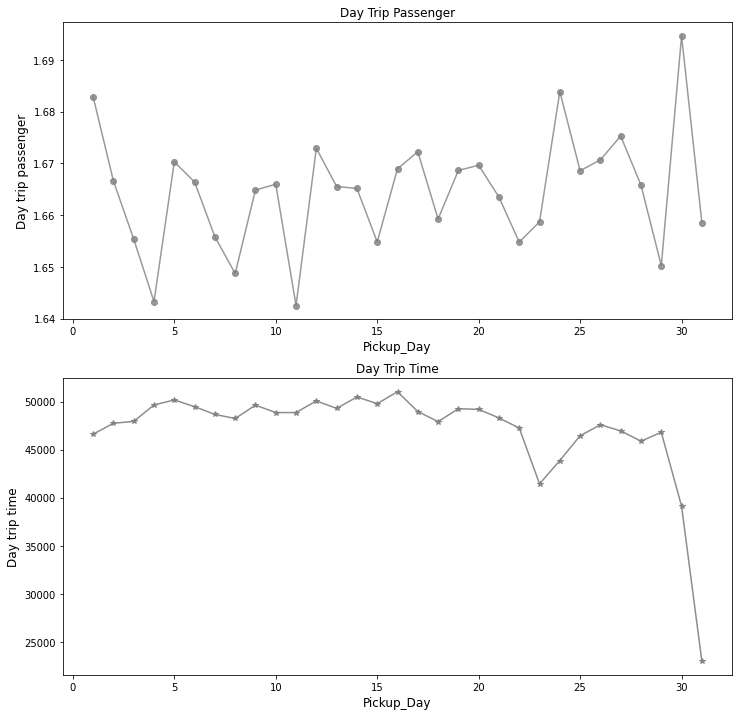

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(211)
ax2= plt.plot(day_trip.pickup_day, day_trip.avg_passenger_count, color="grey", alpha=0.8,marker='o')
plt.title("Day Trip Passenger")
plt.ylabel('Day trip passenger', fontsize=12)
plt.xlabel('Pickup_Day', fontsize=12)

plt.subplot(212)
ax2= plt.plot(day_trip.pickup_day, day_trip.day_trip_times, color="grey", alpha=0.9,marker='*')
plt.title("Day Trip Time")
plt.ylabel('Day trip time', fontsize=12)
plt.xlabel('Pickup_Day', fontsize=12)

plt.show()

# 两张图展示了在2016年1月1日至2016年6月30日这半年内，六个月1~31日的每日订单总量、每日平均乘车人数随日期的波动。

# 两个图（每日订单数量/乘车次数与日平均乘车人数）的趋势惊人地一致。这说明在周期的某一阶段，不仅订单数量增多，而且人们偏向于结伴出行。


In [36]:
train_dataframe["pickup_hour"]=train_dataframe.pickup_datetime.apply(lambda x: x.hour)
train_dataframe.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_yearmonth,pickup_month,pickup_date,pickup_day,pickup_week,pickup_hour
0,id2875421,2,2016-03-14 17:24:00,2016/3/14 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455,201603,3,2016-03-14,14,0,17
1,id2377394,1,2016-06-12 00:43:00,2016/6/12 0:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663,201606,6,2016-06-12,12,6,0
2,id3858529,2,2016-01-19 11:35:00,2016/1/19 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,201601,1,2016-01-19,19,1,11
3,id3504673,2,2016-04-06 19:32:00,2016/4/6 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429,201604,4,2016-04-06,6,2,19
4,id2181028,2,2016-03-26 13:30:00,2016/3/26 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435,201603,3,2016-03-26,26,5,13


In [37]:
train_dataframe["pickup_week"]=train_dataframe.pickup_datetime.apply(lambda x: x.weekday())
week_trip = train_dataframe.groupby(["pickup_month",'pickup_week','pickup_day','pickup_hour'])["trip_duration"].agg(["mean","count"])
week_trip = week_trip.reset_index() 
week_trip.rename(columns={'mean':'week_avg_trip_dur','count':"week_trip_times"}, inplace = True)
x1 = train_dataframe.groupby(["pickup_month",'pickup_week','pickup_day','pickup_hour'])["passenger_count"].agg(["mean"])
x1 = x1.reset_index() 
week_trip["avg_passenger_count"] = x1["mean"]
week_trip.head()

,pickup_month,pickup_week,pickup_day,pickup_hour,week_avg_trip_dur,week_trip_times,avg_passenger_count
0,1,0,4,0,637.505747,87,1.482759
1,1,0,4,1,694.685714,70,1.585714
2,1,0,4,2,622.806452,31,1.645161
3,1,0,4,3,800.333333,24,1.250000
4,1,0,4,4,578.937500,32,1.562500


C:\Users\HSH\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HSH\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HSH\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HSH\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

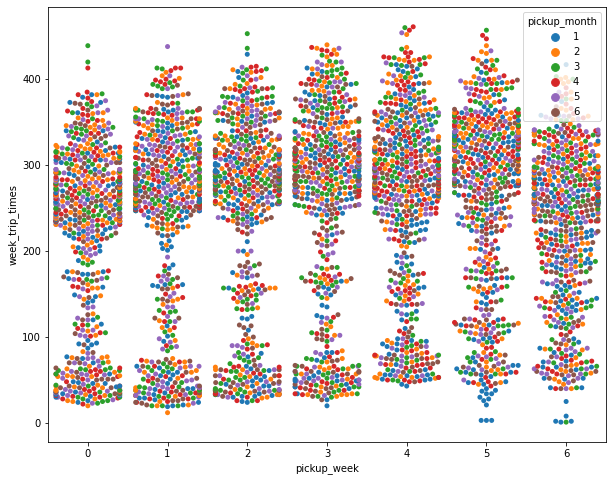

In [38]:
# 周一至周日打车次数/订单数量

plt.figure(figsize=(10,8))
sns.swarmplot(x="pickup_week", y="week_trip_times", hue="pickup_month", data=week_trip)
plt.show()

# 明显周日周一打车次数最低，周五至周六打车次数最高。可能周四至周六市民出行意愿更高。
# 另外发现,周日打车次数/订单数量在100-300区间内明显比周一至周六多。


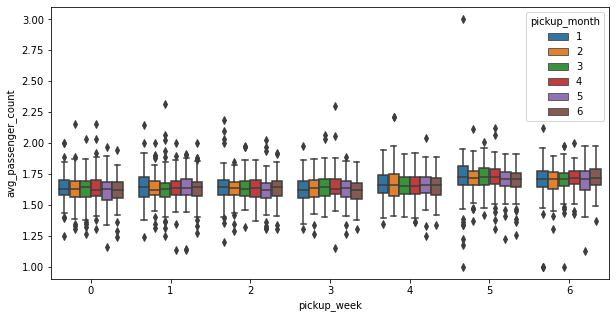

In [39]:
# 周一至周日乘车人数

plt.figure(figsize=(10,5))
sns.boxplot(x="pickup_week", y="avg_passenger_count", hue="pickup_month", data=week_trip)
plt.show()

# 下图可见，周六周日拼车人数较多。


C:\Users\HSH\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HSH\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 32.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HSH\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HSH\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

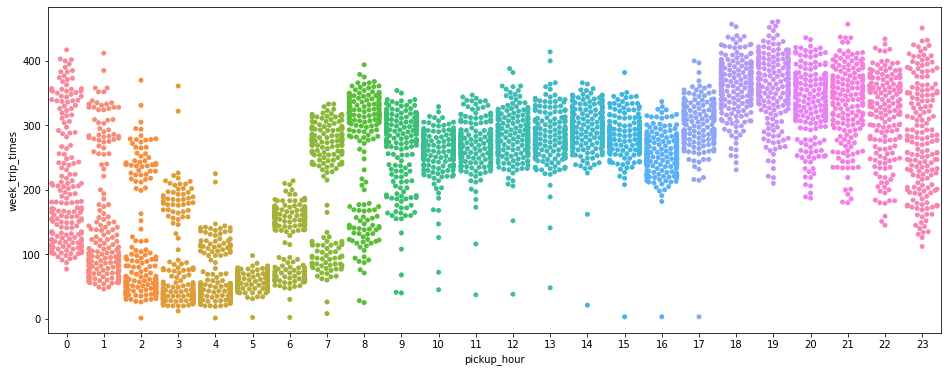

In [40]:
# 当日内0点至24点乘车次数/订单数量

plt.figure(figsize=(16,6))
sns.swarmplot(x="pickup_hour", y="week_trip_times", data=week_trip)
plt.show()

# 从图中可以看出：

# （1）全天候分析：
# 凌晨一点开始至凌晨五点，订单数量急剧下降，符合人群休息规律。从早6点开始，订单量由谷底回升，早7点至早9点有一个早高峰。
# 在早8点到下午5点之间有轻微波动不明显。而早10点和下午4点均有一个轻微的走低点。

# 原因推测：
# 1、市民上班的出行需求被公共交通、私家车等分担，不会偏好于出租车出行；
# 2、假设通勤时间1小时，则基本可确定八点至十点是上班时间小集中的时间段。（此结论与原贴不一致，甚至有轻微相反。）
# 3、早八点和下午四点这两个时间点，人群在公司开会尚未外出（早）或已在出差公司开会还未散会（下午四点）。

# （2）晚高峰表现显著：
# 从晚6点开始订单量有大规模增长，约晚7点进入打车最高峰，且在23点之前的平均打车量均维持较高水平，高于白天时段。

# 原因推测：
# 1、相比于白天，市民在晚上外出活动时更偏向于出租车出行。有可能逐渐下班。
# 2、也猜测晚间时间家庭出行或约伴出行，下面通过乘车人数认证后发现该假设并不成立。

# （3）下午时段，四点左右出现订单量回落。
# 原因推测：
# 1、司机交班；2、道路拥堵；3、出差人群在出差公司开会还未散会下班。


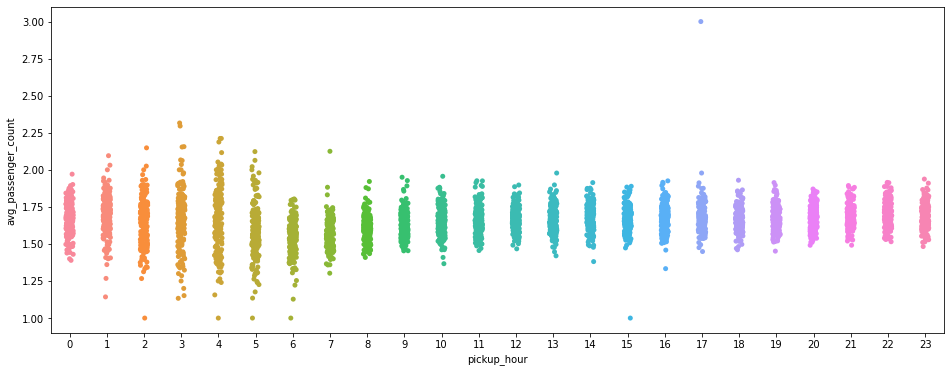

In [41]:
# 当日内0点至24点乘车人数

plt.figure(figsize=(16,6))
sns.stripplot(x="pickup_hour", y="avg_passenger_count", data=week_trip)
plt.show()

# 前面猜测晚间时间家庭出行或约伴出行，这里乘车人数在晚间并无明显变化，故前面猜测不成立。
# 反而发现凌晨2点至5点订单乘车人数较为分散，既有较多人（约伴），也有较少人（单人）的情况。
# 早5点-8点之间，每个订单乘车人数全日最低（boxplot比较清晰，stripplot没那么清晰），恰好又是上班时间，预计是单人上班打车情况较多。


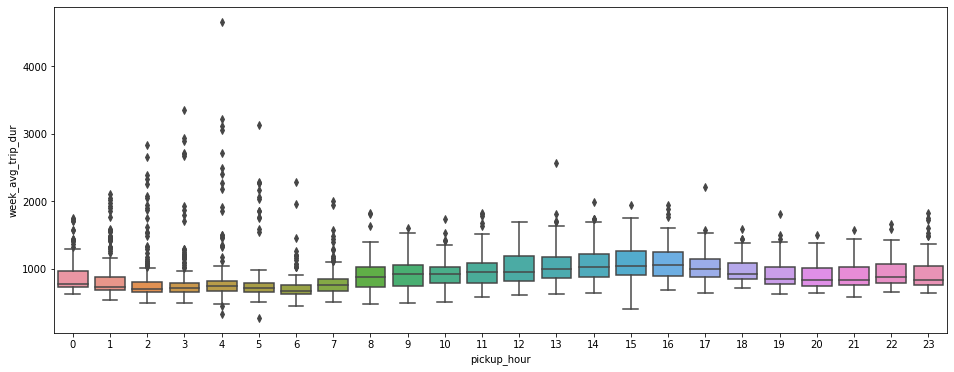

In [43]:
# 当日内0点至24点打车行程时间分布

plt.figure(figsize=(16,6))
y=week_trip["week_avg_trip_dur"][week_trip["week_avg_trip_dur"]<=8000]
daytripdur=sns.boxplot(x="pickup_hour", y=y, data=week_trip)
plt.show()

# 一开始发现三个异常值干扰观察，尝试增加boxplot函数中参数y的重新赋值来忽略异常值（week_avg_trip_dur>8000）。——下图为已修正三个异常值。

# 白天早9点至下午5点，行车时间较长，据此可以推测白天这个时间段道路较为拥塞。

# 凌晨2点至5点，基本可以排除拥塞影响，行程时间长短可近似等同于距离长短。且分布在箱盒之外的长行车时间较多，据此推测：
# 凌晨2点至5点这个时间段接到长距离行程单的机会比其他时间段多很多。



（2）居民夜生活活跃情况分析

订单数量在晚8点至凌晨1点均维持较高水平，从凌晨1点开始，订单量断崖式下跌，这一下跌持续到约早5点，早5点是一天内订单量最低的时刻。
说明纽约市民夜生活活跃情况：
（1）第一种可能：下午/晚上下班后约伴交友灯红酒绿夜夜笙歌，至凌晨1点方歇。
（2）当然，也有第二种可能是：晚晚加班。白天会议下午法定下班时间后，才是晚间工作的开始，然后陆陆续续持续到凌晨十二点。

从国情看，纽约的第一种可能性高一些；而第二种则在中国一线城市发生的概率比率高一些。



（3）城市拥堵性分析

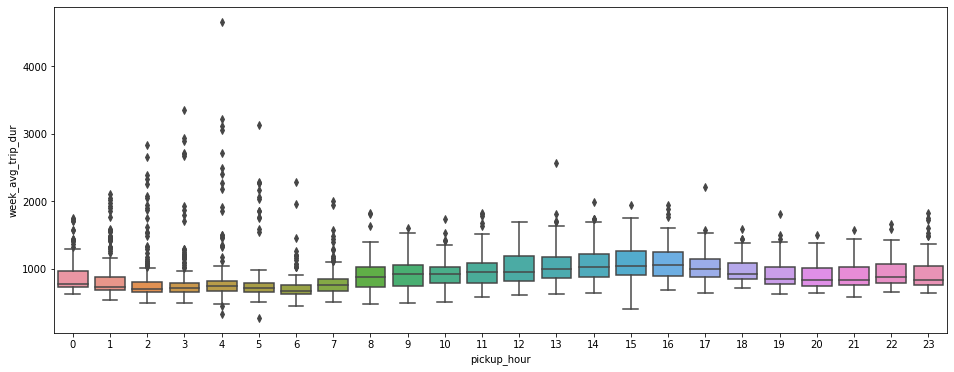

In [44]:
plt.figure(figsize=(16,6))
daytripdur=sns.boxplot(x="pickup_hour", y=y, data=week_trip)
plt.show()

# 数据分析
# 从“当日内0点至24点打车行程时间分布”初步推测：
# 白天早9点至下午5点，行车时间较长，据此可以推测白天这个时间段道路较为拥塞。


（4）长途搭车订单分析

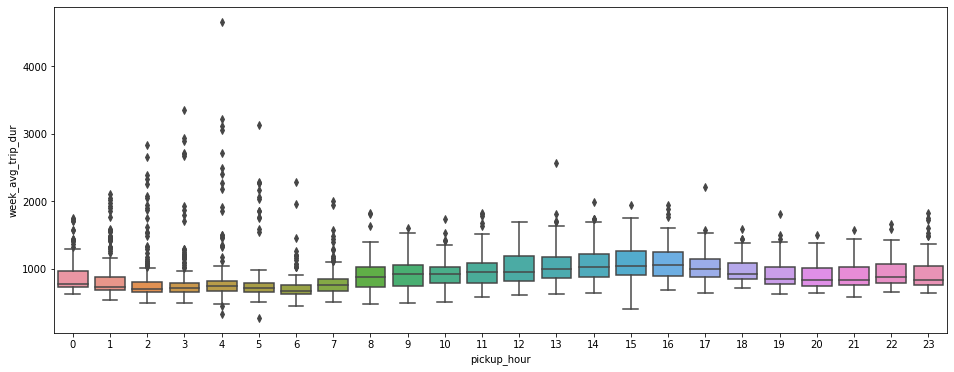

In [45]:
plt.figure(figsize=(16,6))
y=week_trip["week_avg_trip_dur"][week_trip["week_avg_trip_dur"]<=8000]
daytripdur=sns.boxplot(x="pickup_hour", y=y, data=week_trip)
plt.show()

# 数据分析
# 凌晨2点至5点，基本可以排除拥塞影响，行程时间长短可近似等同于距离长短。且分布在箱盒之外的长行车时间较多，据此推测：
# 凌晨2点至5点这个时间段接到长距离行程单的机会比其他时间段多很多。


In [46]:

train_dataframe.describe()

# 数据分析 
# trip_duration 数据项最小值为1.0，最大值为3.526282e+06,明显存在数据异常项

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_yearmonth,pickup_month,pickup_day,pickup_week,pickup_hour
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.534503e+00,1.664382e+00,-7.397342e+01,4.075094e+01,-7.397336e+01,4.075183e+01,9.621448e+02,2.016035e+05,3.515880e+00,1.549864e+01,3.052383e+00,1.360848e+01
std,4.988084e-01,1.314261e+00,4.280165e-02,3.381389e-02,4.274282e-02,3.645002e-02,5.853002e+03,1.680751e+00,1.680751e+00,8.703651e+00,1.954101e+00,6.400348e+00
min,1.000000e+00,0.000000e+00,-7.854740e+01,3.435970e+01,-7.981798e+01,3.218114e+01,1.000000e+00,2.016010e+05,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399186e+01,4.073738e+01,-7.399131e+01,4.073594e+01,3.970000e+02,2.016020e+05,2.000000e+00,8.000000e+00,1.000000e+00,9.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075415e+01,-7.397973e+01,4.075455e+01,6.620000e+02,2.016040e+05,4.000000e+00,1.500000e+01,3.000000e+00,1.400000e+01
75%,2.000000e+00,2.000000e+00,-7.396731e+01,4.076836e+01,-7.396301e+01,4.076984e+01,1.075000e+03,2.016050e+05,5.000000e+00,2.300000e+01,5.000000e+00,1.900000e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.391176e+01,3.526282e+06,2.016060e+05,6.000000e+00,3.100000e+01,6.000000e+00,2.300000e+01


In [51]:
import folium 
from folium.plugins import HeatMap
m = folium.Map([40.86, -74.00], zoom_start=10) # 地图热图展示
HeatMap(train_dataframe[['pickup_latitude', 'pickup_longitude']].dropna(),
 radius=10,
 gradient={0.2: 'blue',
 0.4: 'purple',
 0.6: 'orange',
 0.8: 'red'}
 ).add_to(m)
file_path = r"pickup_map.html"
m.save(file_path)

In [52]:
m = folium.Map([40.86, -74.00], zoom_start=10) # 地图热图展示
HeatMap(train_dataframe[['dropoff_latitude', 'dropoff_longitude']].dropna(),
 radius=10,
 gradient={0.2: 'blue',
 0.4: 'purple',
 0.6: 'orange',
 0.8: 'red'}
 ).add_to(m)
file_path = r"dropoff_map.html"
m.save(file_path)